(9503,)
2018-12-01 00:00:00+01:00    4575.0
2018-12-01 01:00:00+01:00    4558.0
2018-12-01 02:00:00+01:00    4551.0
2018-12-01 03:00:00+01:00    4555.0
2018-12-01 04:00:00+01:00    4468.0
                              ...  
2019-12-31 19:00:00+01:00    1320.0
2019-12-31 20:00:00+01:00     911.0
2019-12-31 21:00:00+01:00     682.0
2019-12-31 22:00:00+01:00     546.0
2019-12-31 23:00:00+01:00     552.0
Name: Wind Offshore, Length: 9503, dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:          Wind Offshore   No. Observations:                 9503
Model:                            GLM   Df Residuals:                     9502
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                      4.9682e+06
Method:                          IRLS   Log-Likelihood:                -86745.
Date:                Wed, 08 May 2024   Deviance:                   4.72

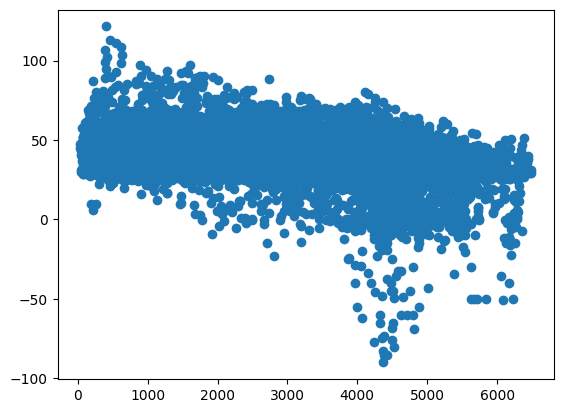

In [96]:
from entsoe import EntsoePandasClient
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.signal import lfilter

client = EntsoePandasClient(api_key="752e3dca-f2aa-49ac-927f-1aebef0173fb")

start = pd.Timestamp('20181201', tz='Europe/Brussels')
end = pd.Timestamp('20200101', tz='Europe/Brussels')
country_code = 'DE_LU'  # Germany
country_code_from = 'FR'  # France
country_code_to = 'DE_LU' # Germany-Luxembourg
type_marketagreement_type = 'A01'
contract_marketagreement_type = "A01"
process_type = 'A51'

# methods that return Pandas Series


label  = pd.read_csv("./dap_outfile.csv", index_col=0)
features = pd.read_csv("./wind_and_solar_forecast.csv", index_col=0)

data = pd.merge(features, label, left_index=True, right_index=True)

label = data["0"]
features = data.drop('0', axis=1)["Wind Offshore"]

# label = np.array(label).reshape(-1, 1)

print(label.shape)
print(features)


normal_model = sm.GLM(features,  label, family=sm.families.Gaussian())
normal_results = normal_model.fit()
print(normal_results.summary())

plt.scatter(features, label)
plt.show()



2018-12-01 00:00:00+01:00    44.33
2018-12-01 01:00:00+01:00    42.09
2018-12-01 02:00:00+01:00    42.03
2018-12-01 03:00:00+01:00    42.05
2018-12-01 04:00:00+01:00    44.56
                             ...  
2019-12-31 19:00:00+01:00    46.00
2019-12-31 20:00:00+01:00    42.20
2019-12-31 21:00:00+01:00    39.74
2019-12-31 22:00:00+01:00    38.88
2019-12-31 23:00:00+01:00    37.39
Name: 0, Length: 9503, dtype: float64
2018-12-01 00:00:00+01:00    375.0
2018-12-01 01:00:00+01:00    375.0
2018-12-01 02:00:00+01:00    375.0
2018-12-01 03:00:00+01:00    375.0
2018-12-01 04:00:00+01:00    375.0
                             ...  
2019-12-31 19:00:00+01:00    797.0
2019-12-31 20:00:00+01:00    816.0
2019-12-31 21:00:00+01:00    816.0
2019-12-31 22:00:00+01:00    816.0
2019-12-31 23:00:00+01:00    816.0
Name: Manual frequency restoration reserve, Length: 9503, dtype: float64
                          Generalized Linear Model Regression Results                           
Dep. Variable:     Man

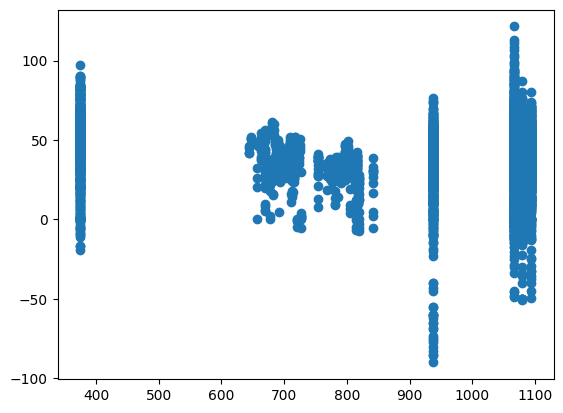

In [97]:

label  = pd.read_csv("./dap_outfile.csv", index_col=0)
features = pd.read_csv("./contracted_reserve_amount.csv", index_col=0)

data = pd.merge(features, label, left_index=True, right_index=True)
label = data["0"]
features = data.drop('0', axis=1)["Manual frequency restoration reserve"].astype(float)

# label = np.array(label).reshape(-1, 1)

print(label)
print(features)


normal_model = sm.GLM(features,  label, family=sm.families.Gaussian())
normal_results = normal_model.fit()
print(normal_results.summary())

plt.scatter(features, label)
plt.show()

2018-12-01 00:00:00+01:00    44.33
2018-12-03 01:00:00+01:00    21.25
2018-12-03 02:00:00+01:00    21.56
2018-12-03 03:00:00+01:00    21.20
2018-12-03 04:00:00+01:00    20.64
                             ...  
2019-12-31 19:00:00+01:00    46.00
2019-12-31 20:00:00+01:00    42.20
2019-12-31 21:00:00+01:00    39.74
2019-12-31 22:00:00+01:00    38.88
2019-12-31 23:00:00+01:00    37.39
Name: 0, Length: 9143, dtype: float64
2018-12-01 00:00:00+01:00    52593.0
2018-12-03 01:00:00+01:00    47708.0
2018-12-03 02:00:00+01:00    46527.0
2018-12-03 03:00:00+01:00    46684.0
2018-12-03 04:00:00+01:00    48009.0
                              ...   
2019-12-31 19:00:00+01:00    57973.0
2019-12-31 20:00:00+01:00    55703.0
2019-12-31 21:00:00+01:00    52760.0
2019-12-31 22:00:00+01:00    51734.0
2019-12-31 23:00:00+01:00    49229.0
Name: Forecasted Load, Length: 9143, dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:        Forecasted Load  

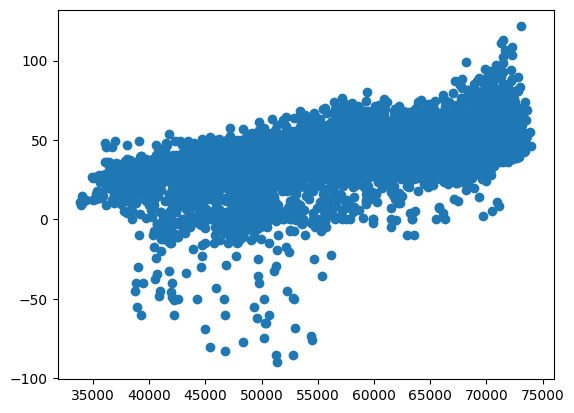

In [98]:

label  = pd.read_csv("./dap_outfile.csv", index_col=0)
features = pd.read_csv("./load_forecast.csv", index_col=0)

data = pd.merge(features, label, left_index=True, right_index=True)
label = data["0"]
features = data.drop('0', axis=1)["Forecasted Load"].astype(float)

# label = np.array(label).reshape(-1, 1)

print(label)
print(features)


normal_model = sm.GLM(features,  label, family=sm.families.Gaussian())
normal_results = normal_model.fit()
print(normal_results.summary())

plt.scatter(features, label)
plt.show()

2018-12-01 00:00:00+01:00    44.33
2018-12-01 01:00:00+01:00    42.09
2018-12-01 02:00:00+01:00    42.03
2018-12-01 03:00:00+01:00    42.05
2018-12-01 04:00:00+01:00    44.56
                             ...  
2019-12-31 19:00:00+01:00    46.00
2019-12-31 20:00:00+01:00    42.20
2019-12-31 21:00:00+01:00    39.74
2019-12-31 22:00:00+01:00    38.88
2019-12-31 23:00:00+01:00    37.39
Name: 0, Length: 9503, dtype: float64
2018-12-01 00:00:00+01:00    56313.0
2018-12-01 01:00:00+01:00    54210.0
2018-12-01 02:00:00+01:00    53516.0
2018-12-01 03:00:00+01:00    53124.0
2018-12-01 04:00:00+01:00    54087.0
                              ...   
2019-12-31 19:00:00+01:00    63107.0
2019-12-31 20:00:00+01:00    59476.0
2019-12-31 21:00:00+01:00    56304.0
2019-12-31 22:00:00+01:00    54844.0
2019-12-31 23:00:00+01:00    52461.0
Name: Actual Aggregated, Length: 9503, dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:      Actual Aggregated

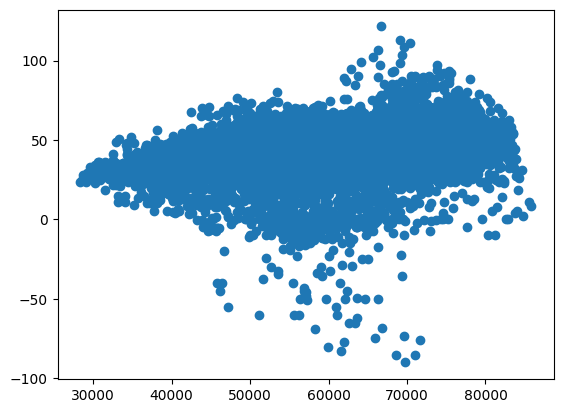

In [99]:
label  = pd.read_csv("./dap_outfile.csv", index_col=0)
features = pd.read_csv("./generation_day_ahead_forecast.csv", index_col=0)

data = pd.merge(features, label, left_index=True, right_index=True)
label = data["0"]
features = data.drop('0', axis=1)["Actual Aggregated"].astype(float)

# label = np.array(label).reshape(-1, 1)

print(label)
print(features)


normal_model = sm.GLM(features,  label, family=sm.families.Gaussian())
normal_results = normal_model.fit()
print(normal_results.summary())

plt.scatter(features, label)
plt.show()

2018-12-01 00:00:00+01:00    44.33
2018-12-01 01:00:00+01:00    42.09
2018-12-01 02:00:00+01:00    42.03
2018-12-01 03:00:00+01:00    42.05
2018-12-01 04:00:00+01:00    44.56
                             ...  
2019-12-31 19:00:00+01:00    46.00
2019-12-31 20:00:00+01:00    42.20
2019-12-31 21:00:00+01:00    39.74
2019-12-31 22:00:00+01:00    38.88
2019-12-31 23:00:00+01:00    37.39
Name: 0, Length: 9503, dtype: float64
2018-12-01 00:00:00+01:00    140.0
2018-12-01 01:00:00+01:00     77.0
2018-12-01 02:00:00+01:00    122.0
2018-12-01 03:00:00+01:00    354.0
2018-12-01 04:00:00+01:00    348.0
                             ...  
2019-12-31 19:00:00+01:00     10.0
2019-12-31 20:00:00+01:00     93.0
2019-12-31 21:00:00+01:00    464.0
2019-12-31 22:00:00+01:00    608.0
2019-12-31 23:00:00+01:00    596.0
Name: flows, Length: 9503, dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:              

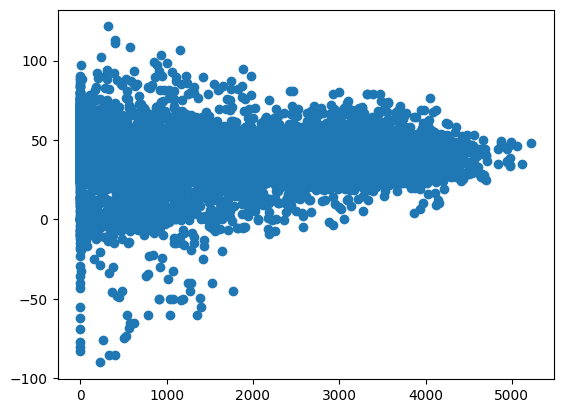

In [100]:
label  = pd.read_csv("./dap_outfile.csv", index_col=0)
features = pd.read_csv("./cross_border_flows.csv", index_col=0)

data = pd.merge(features, label, left_index=True, right_index=True)
label = data["0"]
features = data.drop('0', axis=1)["flows"].astype(float)

# label = np.array(label).reshape(-1, 1)

print(label)
print(features)


normal_model = sm.GLM(features,  label, family=sm.families.Gaussian())
normal_results = normal_model.fit()
print(normal_results.summary())

plt.scatter(features, label)
plt.show()

2999


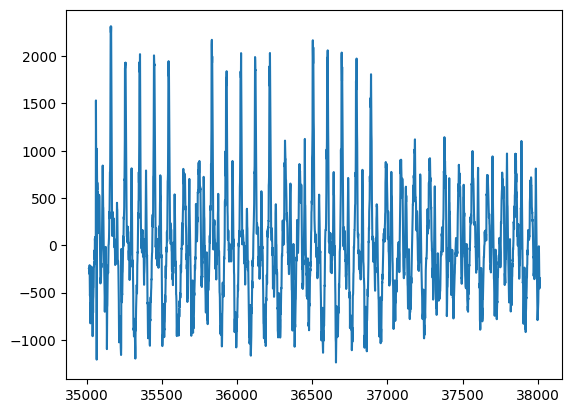

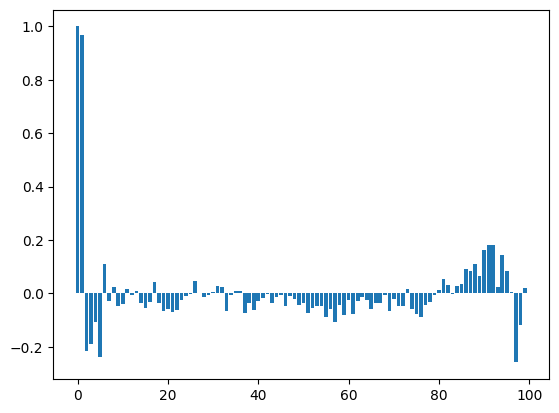

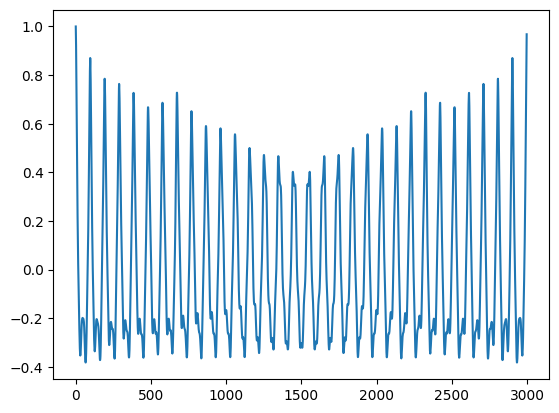

[1.         0.96791546 0.92283817 ... 0.86581052 0.92283817 0.96791546]


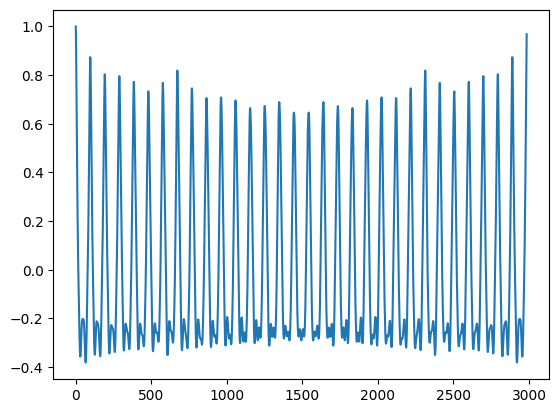

96
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.28649D+00    |proj g|=  4.41163D-02


 This problem is unconstrained.



At iterate    5    f=  6.25949D+00    |proj g|=  2.84603D-02

At iterate   10    f=  6.24256D+00    |proj g|=  2.12079D-03

At iterate   15    f=  6.22671D+00    |proj g|=  8.45917D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   4.270D-06   6.227D+00
  F =   6.2266813928779170     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [1]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import scipy.signal
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

data = pd.read_csv("./actual_load.csv")
data = data.iloc[-3000:]
data["Actual Load"] = data["Actual Load"].astype(float).diff(periods=1)
data = data.dropna()
data_array = data["Actual Load"].to_numpy()
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=data_array[0],
                  initial_state_covariance=1,
                  observation_covariance=5,
                  transition_covariance=1) #0.01) 
state_means, state_covariances = kf.filter(data_array) 


data["Filtered Load"] = state_means
print(len(state_means))

plt.plot(data.index.values,data["Filtered Load"])
plt.show()

train_data = state_means[:-30]
test_data = state_means[-29:]

num_lags = 100
acf_vals = pacf(state_means, nlags = num_lags)

plt.bar(range(num_lags), acf_vals[:num_lags])


L = state_means
L = state_means.flatten()
L = np.round(L, 1)
# Remove DC component, as proposed by Nils Werner
L -= np.mean(L)
# Window signal
#L *= scipy.signal.windows.hann(len(L))

fft = np.fft.rfft(L, norm="ortho")
def abs2(x):
    return x.real**2 + x.imag**2

selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
plt.savefig('first.jpg')
plt.show()


# let's get a max, assuming a least 4 periods...
multipleofperiod=np.argmax(selfconvol[10:])
print(selfconvol)

Ltrunk=L[0:(len(L)//multipleofperiod)*multipleofperiod]

fft = np.fft.rfft(Ltrunk, norm="ortho")
selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
plt.savefig('second.jpg')
plt.show()


#get ranges for first min, second max
fmax=np.max(selfconvol[1:len(Ltrunk)//4])
fmin=np.min(selfconvol[1:len(Ltrunk)//4])
xstartmin=1
while selfconvol[xstartmin]>fmin+0.2*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1

xstartmax=xstartmin
while selfconvol[xstartmax]<fmin+0.7*(fmax-fmin) and xstartmax< len(Ltrunk)//4:
    xstartmax=xstartmax+1

xstartmin=xstartmax
while selfconvol[xstartmin]>fmin+0.2*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1

period=np.argmax(selfconvol[xstartmax:xstartmin])+xstartmax

print(period)


normal_order = (0,1,0)
season_order = (1,0,1, period)
model = SARIMAX(train_data, order= normal_order, seasonal_order = season_order)
model_fit = model.fit()





                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 2969
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 96)   Log Likelihood              -18487.017
Date:                              Wed, 08 May 2024   AIC                          36980.034
Time:                                      22:44:22   BIC                          36998.021
Sample:                                           0   HQIC                         36986.507
                                             - 2969                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L96       0.9694      0.003    346.333      0.000       0.964       0.975
ma.S.L96      -0.77

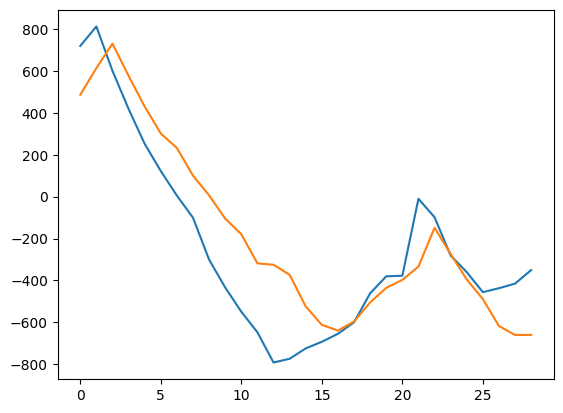

In [2]:
print(model_fit.summary())
predictions = model_fit.forecast(len(test_data))
print(train_data.shape, predictions.shape)
# predictions = np.concatenate((train_data.flatten(), predictions), axis=0)

plt.plot(test_data)
plt.plot(predictions)
plt.show()

In [ ]:
L = state_means
L = state_means.flatten()
L = np.round(L, 1)
# Remove DC component, as proposed by Nils Werner
L -= np.mean(L)
# Window signal
#L *= scipy.signal.windows.hann(len(L))

fft = np.fft.rfft(L, norm="ortho")
def abs2(x):
    return x.real**2 + x.imag**2

selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
plt.savefig('first.jpg')
plt.show()


# let's get a max, assuming a least 4 periods...
multipleofperiod=np.argmax(selfconvol[10:])
print(selfconvol)

Ltrunk=L[0:(len(L)//multipleofperiod)*multipleofperiod]

fft = np.fft.rfft(Ltrunk, norm="ortho")
selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
plt.savefig('second.jpg')
plt.show()


#get ranges for first min, second max
fmax=np.max(selfconvol[1:len(Ltrunk)//4])
fmin=np.min(selfconvol[1:len(Ltrunk)//4])
xstartmin=1
while selfconvol[xstartmin]>fmin+0.2*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1

xstartmax=xstartmin
while selfconvol[xstartmax]<fmin+0.7*(fmax-fmin) and xstartmax< len(Ltrunk)//4:
    xstartmax=xstartmax+1

xstartmin=xstartmax
while selfconvol[xstartmin]>fmin+0.2*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1

period=np.argmax(selfconvol[xstartmax:xstartmin])+xstartmax

print(period)